<a href="https://colab.research.google.com/github/juanCarlosEstrellaC/RepasoCaliforniaHousingConClasesPrediccion/blob/main/RepasoCaliforniaHousingConClasesPrediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [ ]:
from matplotlib import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten
from google.colab import drive
from sklearn.model_selection import train_test_split

import sys
import os
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import sklearn.preprocessing  as pp

# Conectar con el drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clase California

In [ ]:
class California():
  def __init__(self):
    self.BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/RepasoCaliforniaHousingConClasesPrediccion_Folder/"
    sys.path.append(self.BASE_FOLDER)
    self.batchSize = 0
    # Uso el self. para acceder a un atributo desde cualquier método de la clase. Si un atributo que va ser usado en alguna parte del programa
    # está en un método que aún no se ejecuta, el atributo no existirá, por lo que debo ejecutar dicho método y ya podré usarlo desde cualquier parte.
    # En este ejemplo, le puse al atributo en el constructor, para que exista ni bien sea creado el objeto.
    self.a = 2

  def CargarDatos(self):
    self.df = ds.fetch_california_housing(as_frame=True)
 
  def DescribirDatos(self):
    print("Datos en tabla: ")
    print(self.df.frame.head(4)) # Imprime las 4 primeras filas de la tabla. 
    print()
    print("Forma de los datos: {} y de las etiquetas: {}".format(self.df.data.shape, self.df.target.shape))
    print("\nDatos:\n{}\n\nEtiquetas:\n{}".format(self.df.data.dtypes, self.df.target.dtypes))

  def __GraficarEntrenamiento(self, miDataFrame, nombreFPerdidaOMetrica):
    plt.style.use("ggplot")
    axt = miDataFrame["Entrenamiento"].plot(figsize=(10, 5));
    axv = miDataFrame["Validación"].plot(secondary_y=True, style="g", figsize=(10, 5));
    axv.set_ylabel("Validación");
    axv.set_title("[{}]".format(nombreFPerdidaOMetrica));
    axt.set_xlabel('No. Epocas')
    axt.set_ylabel("Entrenamiento");
    axt.legend(loc='lower left')
    axv.legend(loc='upper right')
    # graba info al drive:
    fig1 = plt.gcf()
    plt.savefig(self.FOLDER_EXPERIMENTO + nombreFPerdidaOMetrica +".jpg", bbox_inches='tight')
    plt.show()

  def __GraCorrelacion(self): #GraficaCorrelacion
    sns.pairplot(self.df.frame, hue="MedHouseVal" )
    plt.legend(title="Precio Promedio", bbox_to_anchor=(1.05, 0.95), loc="upper left")
    _ = plt.title("Grafico de Correlación")
    plt.show()

  def __GraficarDistribucionGeograficaPrecio(self): #GraficaDistribuciónGeográficaPrecio
    print("\nDistribución geográfica por precio:")
    sns.scatterplot(data=self.df.frame, x="Longitude", y="Latitude", size="MedHouseVal", hue="MedHouseVal", palette="viridis", alpha=0.5)
    plt.legend(title="Precio Promedio", bbox_to_anchor=(1.05, 0.95), loc="upper left")

  def __GraficarDistribucionDatos(self, datos, paleta): # Muestra qué distribución tienen los datos xD
    columnas =self.df.data.columns
      
    df = pd.DataFrame(datos, columns=columnas )
    fig, axs = plt.subplots(2, 4, figsize=(20,10), constrained_layout=False,  sharex=False, sharey=False)
    for i, ax1 in enumerate(axs.flat):
      sns.histplot(data=df, x=columnas[i], ax= ax1, palette=paleta)
      ax1.grid()

  def ExplorarDatos(self):    
    #self.__GraCorrelacion()
    #self.__GraficarDistribucionDatos(self.df.data, "viridis")
    self.__GraficarDistribucionGeograficaPrecio()
      
  def PrepararDatos(self, parteVal, parteTest, tecnicaLimpieza): #ParteValidación, ParteTest, 
    # Algunos valores están sin self., podrían estar, ya lo intenté y salió bien, pero voy a dejarle como se hizo en clase.
    x_data, x_test, y_data, self.y_test =  train_test_split(self.df.data, self.df.target, test_size= parteTest)
    x_train, x_val, self.y_train, self.y_val =  train_test_split(x_data, y_data, test_size= parteVal)
    
    print("Datos para entrenamiento {}".format(x_train.shape[0]))
    print("Datos para validación {}".format(x_val.shape[0]))
    print("Datos para test {}".format(x_test.shape[0]))

    # En este ejemplo, la profe reasigna los datos a las variables x_train, x_val, x_test ya obtenidos en el split con los normalizados o los que tienen mayores dimensiones.
    # En el ejemplo del Mnist, yo le asigné a nuevas variables esos nuevos cambios, y todo bien, de las dos maneras funciona.
    if tecnicaLimpieza == "N": # los valores estarán de 0 a 1.
      print("Ejecutando la Normalización")
      # En este caso solo normalizo x, mediante minMaxScaler, ya que tengo valores en diferentes magnitudes (unas son monetarios, otras números de cuartos, otras latitudes y longitudes, etc.), 
      # y encima son valores o muy grandes (por ej la población) o muy pequeños (por ej. el núm promedio de habitaciones), por lo que me conviene darle la misma importancia a todos los valores
      # sin tomar en cuenta su tamaño. Si fueran todos los datos de la misma magnitud, como las imágenes en el Mnist, simplemente divido entre 255.
      # En el caso que los valores no quiera tenerlos del 0 al 1, como en la normalización, uso la estandarización.
      
      normalizador = pp.MinMaxScaler() # Proporciona una fórmula de los pdf de la profe, que es para normalizar de otra manera.
      normalizador.fit(x_train)        # Entreno al normalizador solo con los datos de entrenamiento(ahi se define el max y min para cada columna (para la formula de este normalizador))
      x_train_n = normalizador.transform(x_train)
      x_val_n = normalizador.transform(x_val)
      x_test_n = normalizador.transform(x_test)
      self.x_train = x_train_n
      self.x_val =  x_val_n
      self.x_test = x_test_n
    else: # Los valores estarán en relación a la campana de gauss, ie, centrado en 0, con valores positivos a la derecha y negativos a la izquierda. 
      print("Ejecutando la Estandarización")
      estandarizador = pp.StandardScaler()
      x_train_e= estandarizador.fit_transform(x_train)
      x_val_e= estandarizador.transform(x_val)
      x_test_e= estandarizador.transform(x_test)
      self.x_train = x_train_e
      self.x_val = x_val_e
      self.x_test = x_test_e

    #self.__GraficarDistribucionDatos(self.x_train, "muted")

    # Después de graficar la distribución expando las dimensiones, ya que si lo hago antes, no podré hacer dicha gráfica.
    self.x_train = np.expand_dims(self.x_train, -1)
    self.x_val =  np.expand_dims(self.x_val, -1)
    self.x_test =  np.expand_dims(self.x_test, -1)

  def Modelar(self, numeroExperimento, funcionActivacion, Regularizador):
    self.numeroExperimento = numeroExperimento
    self.FOLDER_EXPERIMENTO =self.BASE_FOLDER+'Red Neuronal Artificial '+str(numeroExperimento)+'/'  # Se crea una path(ruta) para cada experimento

    self.miModelo = Sequential()
    self.miModelo.add(Flatten(input_shape = (self.x_train.shape[1],1,1), name="Capa_Entrada" ))  # 8 imputs
    self.miModelo.add(Dense( 16, activation = funcionActivacion , kernel_regularizer= Regularizador , name= "Capa_Oculta_1"))
    self.miModelo.add(Dense(  8, activation = funcionActivacion , kernel_regularizer= Regularizador , name= "Capa_Oculta_2"))
    self.miModelo.add(Dense(  4, activation = funcionActivacion , kernel_regularizer= Regularizador , name= "Capa_Oculta_3"))
    self.miModelo.add(Dense(  1, name= "Capa_Salida")) # en regresión, la Función de Activación de la capa de salida, es lineal, por ende no la coloco explícitamente. Además, en la capa de salida habrá solo 1 neurona, pues es el valor de la casa.
   
    #self.miModelo.summary() 

  def CompilarEntrenarYGraficar(self, numeroEpocas, batchSize, optimizador, funcionPerdidas, metrica):    
    self.batchSize = batchSize
    
    # COMPILO:
    self.miModelo.compile(optimizer= optimizador, loss= funcionPerdidas, metrics= [metrica])
    
    # ENTRENO:
    checkpoint_filepath = self.FOLDER_EXPERIMENTO + "/tmp/pesos.ckpt"
    directorio = os.path.dirname(checkpoint_filepath)
    callBack_Pesos = tf.keras.callbacks.ModelCheckpoint(filepath = directorio, save_freq = 10*self.batchSize, save_weights_only=True) # guarda cada 10 bachsize.
    callBack_ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 20)
    h = self.miModelo.fit(self.x_train, self.y_train, batch_size= self.batchSize, epochs=numeroEpocas, callbacks=[callBack_ES, callBack_Pesos], validation_data= (self.x_val, self.y_val), shuffle=True, verbose=0) 

    # GRAFICO FUNCIÓN DE PERDIDA Y MÉTRICA:
    miDataFrame = pd.DataFrame(h.history['loss'], columns=['Entrenamiento'])
    miDataFrame["Validación"] = pd.DataFrame(h.history['val_loss'])
    self.__GraficarEntrenamiento(miDataFrame, funcionPerdidas.name )

    miDataFrame = pd.DataFrame(h.history[metrica.name], columns=['Entrenamiento'])
    miDataFrame["Validación"] = pd.DataFrame(h.history['val_'+metrica.name])
    self.__GraficarEntrenamiento(miDataFrame, metrica.name)

    # Guardar imagen/esquema del Modelo: (Se guarda una versión gráfica de miModelo.summary)
    imagenModelo = self.FOLDER_EXPERIMENTO + 'Modelo.png'
    tf.keras.utils.plot_model(self.miModelo, to_file = imagenModelo, show_shapes=True, show_layer_names=True)
    
    # Guardar Modelo
    self.miModelo.save(self.FOLDER_EXPERIMENTO+"Modelo.h5")

  def EvaluarModelo(self): # Uso datos de Test
    (perdidas, metricas) = self.miModelo.evaluate(self.x_test, self.y_test, batch_size= self.batchSize)
    print("Exactitud de la Evaluación: Metricas[{0:.2f}%], Perdidas[{1:.2f}]".format(metricas, perdidas))

  def Predecir(self, numeroExperimentos): # Uso datos de Test
    for experimento in range(numeroExperimentos):
      FOLDER_EXPERIMENTO = self.BASE_FOLDER+'Red Neuronal Artificial '+str(experimento + 1)+'/' # +1 porque el rango va desde 0, y no hay experimento número 0.
      print(FOLDER_EXPERIMENTO)
      checkpoint_filepath = FOLDER_EXPERIMENTO+"tmp/pesos.ckpt"
      
      #cargar el modelo
      path = FOLDER_EXPERIMENTO+"Modelo.h5"
      print("Recuperando el modelo... " + path)
      modeloRecupedado = tf.keras.models.load_model(path)
      #cargar los pesos
      print("Recuperando los pesos ... " + checkpoint_filepath)
      modeloRecupedado.load_weights(checkpoint_filepath)

      # Efectuamos la predicción 
      y_pred = modeloRecupedado.predict(self.x_test)
      df = pd.DataFrame(y_pred, columns=['Predicciones'])
      df["Reales"] = pd.DataFrame(self.y_test)
      sns.lineplot(x="Predicciones", y="Reales", data=df)  # Grafica una línea, y si esta está cercana a una con pendiente de 45 grados, entonces, los "datos perdichos y los reales son casi perfectos", dice la profe. 

In [ ]:
Proyecto = California()
Proyecto.CargarDatos()
#Proyecto.DescribirDatos()
#Proyecto.ExplorarDatos()

In [ ]:
Proyecto.PrepararDatos(0.2, 0.15, "E") # parteValidacion, parteTest, tecnica limpieza

Datos para entrenamiento 14035
Datos para validación 3509
Datos para test 3096
Ejecutando la Estandarización


In [ ]:
# HIPERPARÁMETROS: # capas ocultas, 
#                  # neuronas en las capas ocultas, 
#                  Función de Activación, 
#                  Regularizador, 
#                  Número de Epocas,  
#                  BatchSize, 
#                  Optimizador, 
#                  Funcion de Perdidas, 
#                  Métrica
#
# FUNCIÓN DE ACTIVACIÓN: NORMALIZACIÓN: sigmoide, escalada, RELU
#                        ESTANDARIZACIÓN: tanh
#
# REGULARIZADOR: consiste en añadir una penalización a la función de pérdida. Esta penalización produce modelos más simples que generalizan mejor.
#      lasso = L1(): sirve cuando sospechemos q varios atributos de entrada son irrelevantes. Funciona mejor cuando los atributos no están muy correlacionados entre sí.
#      Ridge = L2(): sirve cuando sospechemos q varios atributos de entrada están correlacionados entre sí. Funciona mejor cuando la mayoría de atributos son relevantes.    
#      L1L2(): es la convinación: quita columnas no correlacionadas, y columnas correlacionadas le da importancia. 
#
# BATCHSIZE: subconjuntos para calcular los errores promedios = (yd-y)^2
#            A mayor batch_size el modelo se entrena más rápido.
#
# OPTIMIZADOR: sirve para compilar el modelo. 
#              Hacen el backPropagation
#              Usar SDG, Adam y RMSProp
#              Se pasa como parámetro de algunos optimizadores el learnig_rate(alpha) = ritmo de aprendizaje. De momento, usaré un ritmo de 0.01 (.SGD(learning_rate= 0.01))). 
#
# FUNCION DE PERDIDA: cómo calcular el error, ie, la diferencia entre Ycalculada y Yesperada (Yd-Y)
#                     REGRESIÓN: MSE, MAE y RMSE, para tener valores con unidades de la variable de clase, y MAPE para tener porcentajes
#                     CLASIFICACIÓN: CategoricalCrossentropy(), BinaryCrossentropy()                    
#                     Nota: La función de pérdida es una sola, pero, para las métricas, puede ser más de una.
#
# METRICAS: indica qué tan bien se entrena el modelo. Toda la metrica se hace de los batch.
#                     REGRESIÓN: MSE, MAE y RMSE, para tener valores con unidades de la variable de clase, y MAPE para tener porcentajes
#                     CLASIFICACIÓN: categorical_accuracy, matriz de confusión  

In [ ]:
numeroExperimento = 2
funcionActivacion = tf.keras.activations.sigmoid    
Regularizador = tf.keras.regularizers.L1()     

Proyecto.Modelar(numeroExperimento, funcionActivacion, Regularizador)

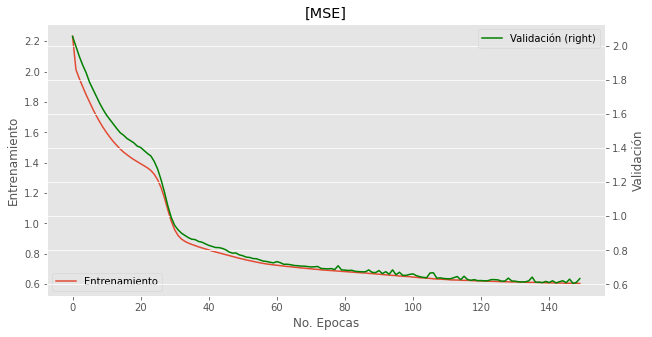

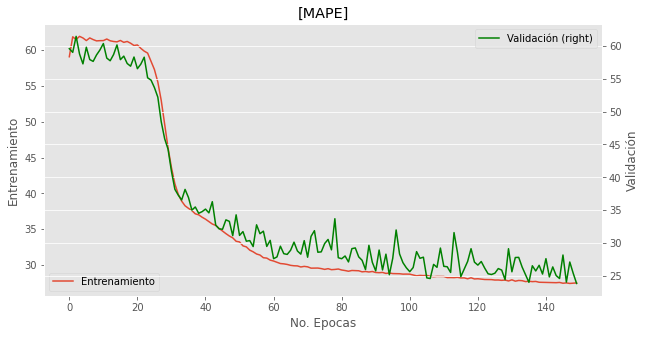

In [ ]:
numeroEpocas = 150
batchSize = 64
optimizador = tf.keras.optimizers.SGD(learning_rate= 0.01) 
funcionPerdidas = tf.keras.losses.MeanSquaredError(name="MSE")   
metrica = tf.keras.metrics.MeanAbsolutePercentageError(name = "MAPE")  

Proyecto.CompilarEntrenarYGraficar(numeroEpocas, batchSize, optimizador, funcionPerdidas, metrica)   

# Grafico 1: funcionPerdidas
# eje X = # Epocas, 
# eje Y = valores en al unidad con la que trabaja la etiqueta, en este caso cientos de miles de dólares.

# Grafico 2: metrica
# eje X = # Epocas, 
# eje Y = valores porcentuales.


In [ ]:
Proyecto.EvaluarModelo()  
# Metricas: qué porcentaje de error de tienen las predicciones. Por ejemplo: Metricas[31.69%], el modelo tiene el 31.69% de error, usando los datos de Test.[c]
# Perdidas: cuánto dinero en promedio no calcula correctamente en las predicciones. Por ejemplo: Perdidas[0.53], el modelo en promedio tiene una pérdida de $53.000 al predecir el valor de una casa, al final de las 100 épocas de este ejercicio.[c]

49/49 [==============================] - 0s 2ms/step - loss: 0.5978 - MAPE: 24.1781
Exactitud de la Evaluación: Metricas[24.18%], Perdidas[0.60]


In [ ]:
#Proyecto.Predecir(2)